<a href="https://colab.research.google.com/github/alouvre/Machine-Learning-Projects/blob/main/CollaborativeFiltering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AKSES KE GOOGLE DRIVE**
---

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# **AKSES DATA DARI REPO GITHUB**
---

In [2]:
!git clone https://github.com/codeheroku/Introduction-to-Machine-Learning.git

Cloning into 'Introduction-to-Machine-Learning'...
remote: Enumerating objects: 537, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 537 (delta 3), reused 6 (delta 2), pack-reused 529
Receiving objects: 100% (537/537), 24.07 MiB | 13.92 MiB/s, done.
Resolving deltas: 100% (172/172), done.


In [3]:
cd Introduction-to-Machine-Learning/Collaborative Filtering/dataset

/content/Introduction-to-Machine-Learning/Collaborative Filtering/dataset


# **COLLABORATIVE FILTERING**
---

Collaborative filtering adalah salah satu metode yang digunakan dalam sistem rekomendasi untuk menghasilkan rekomendasi berdasarkan pola perilaku pengguna atau item yang mirip. Metode ini memang seringkali mencocokkan dua variabel, yaitu pengguna (user) dan item (produk atau konten), tetapi tidak hanya berdasarkan nilai korelasinya.

### Ada dua jenis utama dari collaborative filtering:



#### 1. User-Based Collaborative Filtering
Metode ini mencari pengguna lain yang memiliki preferensi serupa dengan pengguna yang sedang mencari rekomendasi. Ini dilakukan dengan membandingkan riwayat peringkat atau interaksi pengguna dengan item. Pengguna yang memiliki pola peringkat serupa dengan pengguna yang sedang mencari rekomendasi dianggap memiliki preferensi yang mirip. Rekomendasi kemudian dibuat berdasarkan apa yang disukai oleh pengguna-pengguna tersebut.

#### 2. Item-Based Collaborative Filtering
Metode ini mencocokkan item-item yang mirip berdasarkan sejarah peringkat pengguna. Jika sejumlah besar pengguna memberikan peringkat yang serupa pada dua item, maka item-item tersebut dianggap mirip. Rekomendasi kemudian dibuat berdasarkan item yang mirip dengan item yang sedang dicari oleh pengguna.

Dalam kedua jenis collaborative filtering di atas, perhitungan korelasi antara pengguna atau item memang dapat digunakan sebagai salah satu metode untuk menentukan kesamaan. Salah satu metrik yang umum digunakan adalah korelasi Pearson, yang mengukur hubungan linear antara dua variabel. Namun, ada juga metrik lain yang dapat digunakan, seperti jarak kosinus, indeks Jaccard, atau metode lainnya.

# **EXAMPLE**
---

Collaborative filtering adalah teknik yang digunakan dalam sistem rekomendasi untuk memberikan rekomendasi berdasarkan perilaku atau preferensi pengguna. Saya akan memberikan contoh dua jenis utama collaborative filtering, yaitu User-Based Collaborative Filtering dan Item-Based Collaborative Filtering, menggunakan dataset sederhana sebagai ilustrasi.

## Contoh 1

Misalkan Anda memiliki dataset peringkat film oleh beberapa pengguna. Dataset ini mungkin terlihat seperti ini:

In [4]:
import pandas as pd
import numpy as np

In [5]:
# membuat data
data_ratings = {
    'User_ID' : ['User_1', 'User_2', 'User_3', 'User_4'],
    'Movie_1' : [5, np.nan, 3, 4],
    'Movie_2' : [4, 5, np.nan, 2],
    'Movie_3' : [np.nan, 4, np.nan, 3]
}
data_ratings

{'User_ID': ['User_1', 'User_2', 'User_3', 'User_4'],
 'Movie_1': [5, nan, 3, 4],
 'Movie_2': [4, 5, nan, 2],
 'Movie_3': [nan, 4, nan, 3]}

In [6]:
# membuat dataframe berdasarkan data
df = pd.DataFrame(data_ratings)
# menampilkan dataframe df
df

,User_ID,Movie_1,Movie_2,Movie_3
0,User_1,5.0,4.0,NaN
1,User_2,NaN,5.0,4.0
2,User_3,3.0,NaN,NaN
3,User_4,4.0,2.0,3.0


Dalam User-Based Collaborative Filtering, kita akan mencari pengguna lain yang memiliki preferensi serupa dengan pengguna yang sedang mencari rekomendasi. Misalnya, jika User_1 menyukai Movie_1 dan Movie_2, kita dapat mencari pengguna lain yang juga memberikan peringkat tinggi untuk Movie_1 dan Movie_2. Jika User_3 memberikan peringkat tinggi untuk Movie_1, kita dapat mengasumsikan bahwa User_1 dan User_3 memiliki preferensi serupa.

# **CASE - Movie Recomendation**
---

In [7]:
import pandas as pd
from scipy import sparse

In [8]:
# inisialisasi data rating
ratings = pd.read_csv('ratings.csv')
# inisialisasi data movies
movies = pd.read_csv('movies.csv')
# mengetahui dimensi data ratings
print(ratings.shape)
# menampilkan 5 baris pertama dari data rating
ratings.head()

(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
# mengetahui dimensi dari data movies
print(movies.shape)
# menampilkan 5 baris pertama
movies.head()

(9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
# drop kolom genres dan timestamp
# kolom yang akan digunakan kolom movieId, title, userId, dan rating
ratings = pd.merge(movies, ratings).drop(['genres','timestamp'],axis=1)
# menampilkan 5 baris pertama
ratings.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5


In [11]:
# membuat pivot table
# jadi ini data pemberian rating pada film oleh user
# kolomnya nama-nama film
# valuenya rating tiap film
userRatings = ratings.pivot_table(index=['userId'],
                                  columns=['title'],
                                  values='rating')
# menampilkan dimensi sebelum perubahan
print("Before: ",userRatings.shape)
# menampilkan 5 baris pertama
userRatings.head()

Before:  (610, 9719)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# drop nilai yang bukan NaN yang jumlahnya kurang dari 10
# replace NaN menjadi 0
userRatings = userRatings.dropna(thresh=10, axis=1).fillna(0,axis=1)
# menampilkan dimensi setelah perubahan
print("After: ",userRatings.shape)
# menampilkan 5 baris pertama
userRatings.head()

After:  (610, 2269)


title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# mengetahui korelasi antara semua pasangan kolom dalam dataframe
# metode pearson ini untuk mengukur hubungan linear antara 2 variabel
corrMatrix = userRatings.corr(method='pearson')
# menampilkan 100 baris pertama
corrMatrix.head(100)

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",1.000000,0.063117,-0.023768,0.143482,0.011998,0.087931,0.224052,0.034223,0.009277,0.008331,...,0.017477,0.032470,0.134701,0.153158,0.101301,0.049897,0.003233,0.187953,0.062174,0.353194
(500) Days of Summer (2009),0.063117,1.000000,0.142471,0.273989,0.193960,0.148903,0.142141,0.159756,0.135486,0.200135,...,0.374515,0.178655,0.068407,0.414585,0.355723,0.252226,0.216007,0.053614,0.241092,0.125905
10 Cloverfield Lane (2016),-0.023768,0.142471,1.000000,-0.005799,0.112396,0.006139,-0.016835,0.031704,-0.024275,0.272943,...,0.242663,0.099059,-0.023477,0.272347,0.241751,0.195054,0.319371,0.177846,0.096638,0.002733
10 Things I Hate About You (1999),0.143482,0.273989,-0.005799,1.000000,0.244670,0.223481,0.211473,0.011784,0.091964,0.043383,...,0.243118,0.104858,0.132460,0.091853,0.158637,0.281934,0.050031,0.121029,0.130813,0.110612
"10,000 BC (2008)",0.011998,0.193960,0.112396,0.244670,1.000000,0.234459,0.119132,0.059187,-0.025882,0.089328,...,0.260261,0.087592,0.094913,0.184521,0.242299,0.240231,0.094773,0.088045,0.203002,0.083518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Almost Famous (2000),0.099554,0.209549,0.032088,0.296727,0.134434,0.118628,0.242958,0.079158,0.005092,0.051279,...,0.244619,0.085395,0.072505,0.221259,0.126008,0.362571,0.011577,0.208008,0.186599,0.147413
Along Came Polly (2004),0.027287,0.282426,0.113213,0.193085,0.162678,0.180259,0.112928,0.121704,0.125792,0.124032,...,0.173133,0.160430,0.029076,0.189165,0.166278,0.309183,0.078468,-0.036498,0.231566,0.025928
Along Came a Spider (2001),0.064762,-0.003205,0.016372,0.085365,-0.018241,0.080388,0.094016,-0.016678,0.079375,-0.028052,...,0.115347,0.093774,0.085286,0.150757,0.052144,0.174489,0.014189,0.025327,0.233244,0.043581


In [14]:
# fungsi get_similar
# untuk mencari film-film yang memiliki korelasi tinggi dalam film tertentu
# berdasarkan matriks korelasi yang telah dihitung sebelumnya (dinyatakan pada corrMatrix)
def get_similar(movie_name,rating):
  # mengambil korelasi antara film tertentu dengan semua film lainnya
  similiar_ratings = corrMatrix[movie_name]*(rating-2.5)
  # mengurutkan film-film berdasarkan nilai korelasi secara menurun
  similiar_ratings = similiar_ratings.sort_values(ascending=False)
  # print(type(similiar_ratings))
  return similiar_ratings

In [15]:
# Contoh inputan dari User
# Misalkan User melakukan pencarian sebanyak 4 kali dengan kategori romantic-lover
# Daftar film-film yang dicari dan peringkat yang diberikan
romantic_lover = [("(500) Days of Summer (2009)",5),
                  ("Alice in Wonderland (2010)",3),
                  ("Aliens (1986)",1),
                  ("2001: A Space Odyssey (1968)",2)]
# membuat dataframe kosong
similiar_movies = pd.DataFrame()
# pengulangan untuk daftar romantic_lover
for movie,rating in romantic_lover:
  # memanggil fungsi get_similar
  # untuk mencari film-film yang mirip berdasarkan film dan peringkat
  similiar_movies = similiar_movies.append(get_similar(movie,rating),
                                           ignore_index=True)
# menampilkan 5 baris pertama
similiar_movies.head()

<ipython-input-15-bbdcdfe0d0df>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similiar_movies = similiar_movies.append(get_similar(movie,rating),
<ipython-input-15-bbdcdfe0d0df>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similiar_movies = similiar_movies.append(get_similar(movie,rating),
<ipython-input-15-bbdcdfe0d0df>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similiar_movies = similiar_movies.append(get_similar(movie,rating),
<ipython-input-15-bbdcdfe0d0df>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similiar_movies = similiar_movies.append(get_similar(movie,rating),


title,(500) Days of Summer (2009),Silver Linings Playbook (2012),Adventureland (2009),Up in the Air (2009),50/50 (2011),"Descendants, The (2011)","Crazy, Stupid, Love. (2011)",About Time (2013),Toy Story 3 (2010),"Secret Life of Walter Mitty, The (2013)",...,"Remains of the Day, The (1993)",Leaving Las Vegas (1995),"Grifters, The (1990)","English Patient, The (1996)",Dances with Wolves (1990),Stargate (1994),"Madness of King George, The (1994)",Disclosure (1994),"Postman, The (Postino, Il) (1994)",Clear and Present Danger (1994)
0,2.500000,1.254898,1.157021,1.129961,1.123890,1.082774,1.076731,1.050643,1.050386,1.043048,...,-0.127058,-0.131261,-0.134995,-0.135628,-0.142231,-0.142870,-0.144495,-0.160575,-0.161373,-0.209810
1,0.203998,0.191226,0.130105,0.221842,0.139619,0.058567,0.186331,0.148771,0.147115,0.179240,...,-0.004244,-0.022697,0.000935,-0.028072,0.013454,-0.010708,-0.022814,-0.030627,-0.025479,-0.036196
2,-0.062634,-0.131106,-0.091790,-0.205500,-0.112038,-0.187131,-0.131742,-0.057615,-0.170463,-0.160831,...,-0.066664,-0.093771,-0.308606,-0.328057,-0.170352,-0.329190,-0.110041,0.122334,-0.113838,-0.124716
3,-0.056808,-0.060217,-0.083101,-0.093265,-0.064954,-0.059233,-0.042563,-0.039608,-0.063763,-0.063478,...,-0.022207,-0.035515,-0.144882,-0.141102,-0.047911,-0.078467,-0.020044,0.022402,-0.061293,-0.023133


In [16]:
# menghitung total nilai korelasi dari Dataframe similar_movies
# dilakukan pengurutan secara menurun
# dengan menampilkan 20 baris pertama
similiar_movies.sum().sort_values(ascending=False).head(20)

title
(500) Days of Summer (2009)                      2.584556
Alice in Wonderland (2010)                       1.395229
Silver Linings Playbook (2012)                   1.254800
Yes Man (2008)                                   1.116264
Adventureland (2009)                             1.112235
Marley & Me (2008)                               1.108381
About Time (2013)                                1.102192
Crazy, Stupid, Love. (2011)                      1.088757
50/50 (2011)                                     1.086517
Help, The (2011)                                 1.075963
Up in the Air (2009)                             1.053037
Holiday, The (2006)                              1.034470
Friends with Benefits (2011)                     1.030875
Notebook, The (2004)                             1.025880
Easy A (2010)                                    1.015771
Secret Life of Walter Mitty, The (2013)          0.997979
Perks of Being a Wallflower, The (2012)          0.967425
Toy Stor

In [17]:
# Contoh Inputan User
# Misalkan User melakukan pencarian 4 kali dengan kategori action-lover
# Daftar film-film yang dicari dengan peringkat yang diberikan
action_lover = [("Amazing Spider-Man, The (2012)",5),
                ("Mission: Impossible III (2006)",4),
                ("Toy Story 3 (2010)",2),
                ("2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",4)]
# membuat dataframe kosong
similiar_movies = pd.DataFrame()
# pengulangan untuk daftar action_lover
for movie,rating in action_lover:
  # memanggil fungsi get_similar
  # untuk mencari film-film yang mirip berdasarkan film dan peringkat
  similiar_movies = similiar_movies.append(get_similar(movie,rating),
                                           ignore_index=True)
# menampilkan 5 baris pertama
similiar_movies.head()

<ipython-input-17-c2a3932a9dfe>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similiar_movies = similiar_movies.append(get_similar(movie,rating),
<ipython-input-17-c2a3932a9dfe>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similiar_movies = similiar_movies.append(get_similar(movie,rating),
<ipython-input-17-c2a3932a9dfe>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similiar_movies = similiar_movies.append(get_similar(movie,rating),
<ipython-input-17-c2a3932a9dfe>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similiar_movies = similiar_movies.append(get_similar(movie,rating),


title,"Amazing Spider-Man, The (2012)",Captain America: The First Avenger (2011),Thor (2011),Wreck-It Ralph (2012),Star Trek Into Darkness (2013),The Hunger Games: Mockingjay - Part 1 (2014),The Amazing Spider-Man 2 (2014),X-Men: First Class (2011),Tron: Legacy (2010),Thor: The Dark World (2013),...,Outbreak (1995),"Grifters, The (1990)",Nine Months (1995),Arsenic and Old Lace (1944),"Madness of King George, The (1994)",Disclosure (1994),Like Water for Chocolate (Como agua para chocolate) (1992),"Postman, The (Postino, Il) (1994)",Dead Man Walking (1995),"Piano, The (1993)"
0,2.500000,1.370454,1.324846,1.302965,1.301220,1.298310,1.297114,1.284405,1.268557,1.250917,...,-0.106419,-0.110307,-0.114825,-0.115754,-0.118070,-0.120780,-0.122878,-0.131861,-0.134867,-0.170358
1,0.534632,0.546741,0.534338,0.508677,0.397879,0.266710,0.658657,0.489909,0.558632,0.590377,...,0.142277,-0.067056,0.036215,-0.030504,-0.071775,0.021249,-0.074697,-0.045873,-0.000239,-0.026444
2,-0.196097,-0.212966,-0.221254,-0.159085,-0.217821,-0.174118,-0.195072,-0.252112,-0.104276,-0.183114,...,0.030545,0.020097,0.007077,0.019074,0.034244,0.039228,0.024539,0.038244,0.004534,0.040765
3,0.394598,0.304620,0.364342,0.415351,0.389789,0.265608,0.392979,0.281709,0.388931,0.327142,...,0.017307,-0.053135,-0.031720,-0.055758,-0.056874,-0.025216,-0.059190,-0.063517,-0.046472,-0.073868


In [18]:
# menghitung total nilai korelasi dari Dataframe similar_movies
# dilakukan pengurutan secara menurun
# dengan menampilkan 20 baris pertama
similiar_movies.sum().sort_values(ascending=False).head(20)

title
Amazing Spider-Man, The (2012)                           3.233134
Mission: Impossible III (2006)                           2.874798
2 Fast 2 Furious (Fast and the Furious 2, The) (2003)    2.701477
Over the Hedge (2006)                                    2.229721
Crank (2006)                                             2.176259
Mission: Impossible - Ghost Protocol (2011)              2.159666
Hancock (2008)                                           2.156098
The Amazing Spider-Man 2 (2014)                          2.153677
Hellboy (2004)                                           2.137518
Snakes on a Plane (2006)                                 2.137396
Jumper (2008)                                            2.129716
Chronicles of Riddick, The (2004)                        2.121689
Tron: Legacy (2010)                                      2.111843
Fantastic Four (2005)                                    2.083022
X-Men: The Last Stand (2006)                             2.077530
Wrec

# **RECOMMENDATION SYSTEM**
---

User-based collaborative filtering is also called user-user collaborative filtering. It is a type recommendatioin system algorithm that uses user similarity to make product recommendations.

In this tutorial, we will talk about
- What is user-based (user-user) collaborative filtering?
- How to create a user-product matrix?
- How to process data for user-based collaborative filtering?
- How to identify similar users?
- How to narrow down the items pool?
- How to rank items for the recommendation?
- How to predict the rating score?

##**Step 0: User-Based Collaborative Filtering Recommendation Algorithm**

Firstly, let's understand how User-based collaborative filtering works.
User-based collaborative filtering makes recommendation based on user-product interactions in the past. The assumption behind algorithm is that similar users like similar products.
User-based collaborative filtering algorithm usually has the following steps:
1. Find similar users based on interactions with common items.
2. Identify the items rated high by similar users but have not been exposed to the active user of interest
3. Calculate the weight average score for each item.
4. Rank items based on the score and pick top n items to recommend

## **Step 1: Import Python Libraries**

In the first step, we will import Python libraries pandas, numpy, and scipy.stats. These three libraries are for data processing and calculations.

We also imported seaborn for visualization and cosine_similarity for calculating similarity score.

In [82]:
# Data Processing
import pandas as pd
import numpy as np
import scipy.stats

# Visualization
import seaborn as sns

# Similarity
from sklearn.metrics.pairwise import cosine_similarity

## **Step 2: Download and Read In Data**

This tutorials uses the movieless dataset. This dataset contains actual user ratings of movies.

In step 2, we will follow the steps below to get the datasets:
1. Go to https://grouplens.org/datasets/movielens/
2. Download the 100k dataset with the file name "ml-latest-small.zip"
3. Unzip "ml-latest-small.zip"
4. Copy the "ml-latest-small" folder to your project folder

Those who are using Google Colab for this analysis need to mount Google Drive to read the dataset. You can ignore the code below if you are not using Google Colab.



In [83]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [84]:
!pwd

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
pwd: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected


In [ ]:
# Change directory
import os
os.chdir("drive/MyDrive/Recommendation_System")

# Print out the current directory
!pwd

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-85-31c5f88d1bb1>", line 3, in <cell line: 3>
    os.chdir("drive/MyDrive/Recommendation_System")
OSError: [Errno 107] Transport endpoint is not connected: 'drive/MyDrive/Recommendation_System'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_con

There are multiple datasets in the 100k movielens folder. For this tutorial, we will use two ratings and movies.

Now let's read in the rating data.

In [85]:
import pandas as pd

In [ ]:
# Read In data
ratings = pd.read_csv("ml-latest-small/ratings.csv")

# Take a look at the data
ratings.head()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-86-ff6376510c2e>", line 2, in <cell line: 2>
    ratings = pd.read_csv("ml-latest-small/ratings.csv")
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 950, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 605, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 1442, in __init__
    self._engine =

There are four columns in the ratings dataset, userID, movieID, rating, and timestamp.

The dataset has over 100k records, and there is no missing data.

In [86]:
# Get the dataset information
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


The 100k ratings are from 610 users on 9724 movies. The rating has ten unique values from 0.5 to 5.

In [87]:
# Number of users
print('The ratings dataset has', ratings['userId'].nunique(), 'unique users')

# Number of movies
print('The ratings dataset has', ratings['movieId'].nunique(), 'unique movies')

# List of unique ratings
print('The unique ratings are', sorted(ratings['rating'].unique()))

The ratings dataset has 610 unique users
The ratings dataset has 9724 unique movies
The unique ratings are [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


Next; Let's read in the movies data to get the movie names.

The movies dataset has movieID, title, and genres.

In [ ]:
# Read in Data
movies = pd.read_csv('ml-latest-small/movies.csv')

# Take a look at the data
movies.head()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-88-a1b85ba16a9d>", line 2, in <cell line: 2>
    movies = pd.read_csv('ml-latest-small/movies.csv')
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 950, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 605, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 1442, in __init__
    self._engine = s

In [88]:
# Get the dataset information
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


Using 'movieID' as the matchmaking key, we appended movie information to the rating dataset and named it 'df'. So now we have the movie tile and movie rating in the same dataset!

In [89]:
# Merge ratings and movies datasets
df = pd.merge(ratings, movies, on='movieId', how='inner')

# Take a look at the data
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


## **Step 3: Exploratory Data Analysis (EDA)**

In step 3, we need to filter the movies and keep only thoose with over 100 ratings for the analysis. This is to make the calculation manageable by the Google Colab memory.

To do that, we first group movies by title, count the number of ratings, and keep only the movies with greater than 100 ratings.

The average ratings for the movies are calculated as well.

From the .info() output, we can see that there are 134 left.

In [90]:
# Aggregate by movie
agg_ratings = df.groupby('title').agg(mean_rating = ('rating', 'mean'),
                                      number_of_ratings = ('rating', 'count')).reset_index()
agg_ratings.head()

,title,mean_rating,number_of_ratings
0,'71 (2014),4.0,1
1,'Hellboy': The Seeds of Creation (2004),4.0,1
2,'Round Midnight (1986),3.5,2
3,'Salem's Lot (2004),5.0,1
4,'Til There Was You (1997),4.0,2


In [91]:
# Keep the movies with over 100 ratings
agg_ratings_GT100 = agg_ratings[agg_ratings['number_of_ratings']>100]

In [92]:
agg_ratings_GT100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 74 to 9615
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              134 non-null    object 
 1   mean_rating        134 non-null    float64
 2   number_of_ratings  134 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.2+ KB


In [93]:
agg_ratings_GT100.head()

,title,mean_rating,number_of_ratings
74,2001: A Space Odyssey (1968),3.894495,109
207,Ace Ventura: Pet Detective (1994),3.040373,161
298,Aladdin (1992),3.792350,183
327,Alien (1979),3.969178,146
333,Aliens (1986),3.964286,126


Let's check what the most popular movies and their ratings are

In [94]:
# Check popular movies
agg_ratings_GT100.sort_values(by='number_of_ratings', ascending=False).head(20)

,title,mean_rating,number_of_ratings
3158,Forrest Gump (1994),4.164134,329
7593,"Shawshank Redemption, The (1994)",4.429022,317
6865,Pulp Fiction (1994),4.197068,307
7680,"Silence of the Lambs, The (1991)",4.161290,279
5512,"Matrix, The (1999)",4.192446,278
8001,Star Wars: Episode IV - A New Hope (1977),4.231076,251
4662,Jurassic Park (1993),3.750000,238
1337,Braveheart (1995),4.031646,237
8363,Terminator 2: Judgment Day (1991),3.970982,224
7421,Schindler's List (1993),4.225000,220


Next, let's use a jointplot to check the correlation between the average rating and the number of ratings.

We can see an upward trend from the scatter plot, showing that popular movies get higher ratings.

The average rating distribution shows that most movies in the dataset have an average rating of around 4.

The number of rating distribution shows that the most movies have less than 150 ratings.

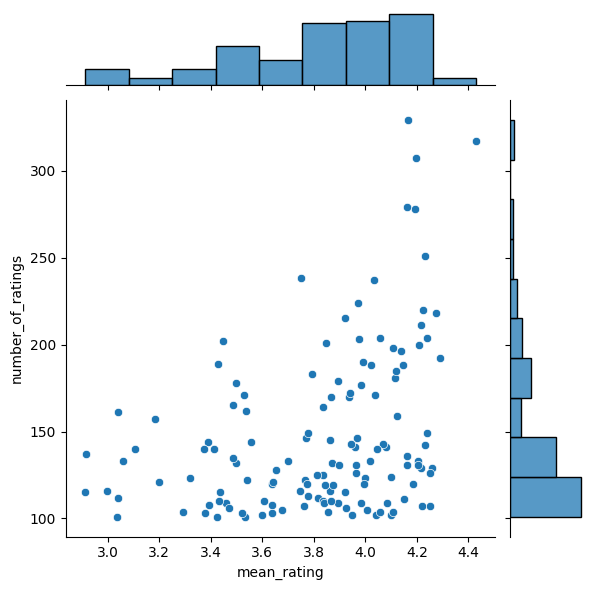

In [95]:
import seaborn as sns
# Visualization
sns.jointplot(x='mean_rating',
              y='number_of_ratings',
              data=agg_ratings_GT100)

To keep only the 134 movies with more than 100 ratings, we need to join the movie with the user-rating level dataframe.

how='inner' and on='title' ensure that only the movies with more than 100 ratings are included.

In [96]:
# merge data
df_GT100 = pd.merge(df, agg_ratings_GT100[['title']],
                    on='title', how='inner')
print(df_GT100.info())
df_GT100.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19788 entries, 0 to 19787
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     19788 non-null  int64  
 1   movieId    19788 non-null  int64  
 2   rating     19788 non-null  float64
 3   timestamp  19788 non-null  int64  
 4   title      19788 non-null  object 
 5   genres     19788 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.1+ MB
None


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [97]:
# Number of users
print('The ratings dataset has', df_GT100['userId'].nunique(), 'unique users')

# Number of movies
print('The ratings dataset has', df_GT100['movieId'].nunique(), 'unique movies')

# Number of ratings
print('The ratings dataset has', df_GT100['rating'].nunique(), 'unique ratings')

# List of unique ratings
print('The unique ratings are', sorted(df_GT100['rating'].unique()))

The ratings dataset has 597 unique users
The ratings dataset has 134 unique movies
The ratings dataset has 10 unique ratings
The unique ratings are [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


## **Step 4: Create User-Movie Matrix**

In step 4, we will transform the dataset into a matrix fromat. The rows of the matrix are users, and the columns of the matrix are movies. The value of the matrix is the user rating of the movie if there is a rating. Otherwise, it shows 'NaN'.

In [98]:
# Create user-item matrix
matrix = df_GT100.pivot_table(index='userId',
                              columns='title',
                              values='rating')
matrix.head()

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apocalypse Now (1979),...,True Lies (1994),"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),Up (2009),"Usual Suspects, The (1995)",WALL·E (2008),Waterworld (1995),Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,3.0,NaN,5.0,NaN,NaN,5.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN
5,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN


Since some people tend to give a higher rating than others, we normalize the rating by extracting the average rating of each user.

After normalization, the movies with a rating less than the user's average rating get a positive value.

In [99]:
# Normalize user-item matrix
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis='rows')
matrix_norm.head()

title,2001: A Space Odyssey (1968),Ace Ventura: Pet Detective (1994),Aladdin (1992),Alien (1979),Aliens (1986),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",American Beauty (1999),American History X (1998),American Pie (1999),Apocalypse Now (1979),...,True Lies (1994),"Truman Show, The (1998)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Twister (1996),Up (2009),"Usual Suspects, The (1995)",WALL·E (2008),Waterworld (1995),Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,-0.392857,NaN,NaN,0.607143,0.607143,NaN,-0.392857,...,NaN,NaN,NaN,-1.392857,NaN,0.607143,NaN,NaN,0.607143,0.607143
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,0.617647,NaN,NaN,NaN,1.617647,NaN,NaN,NaN,...,NaN,NaN,-1.382353,NaN,NaN,NaN,NaN,NaN,0.617647,NaN
5,NaN,-0.461538,0.538462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.461538,NaN,NaN,NaN,NaN,0.538462,NaN,NaN,NaN,NaN


## **Step 6: Identify Similar Users**

There are different ways to measure similarities. Pearson correlation and cosine similarity are two widely used methods.

In this tutorial, we will calculate the user similarity matrix using Pearson correlation.

In [100]:
# User similarity matrix using Pearson correlation
user_similarity = matrix_norm.T.corr()
user_similarity.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,NaN,0.391797,0.180151,-0.439941,-0.029894,0.464277,1.0,-0.037987,...,0.091574,0.254514,0.101482,-0.500000,0.780020,0.303854,-0.012077,0.242309,-0.175412,0.071553
2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,-0.583333,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.229416,NaN,0.765641
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.391797,NaN,NaN,1.000000,-0.394823,0.421927,0.704669,0.055442,NaN,0.360399,...,-0.239325,0.562500,0.162301,-0.158114,0.905134,0.021898,-0.020659,-0.286872,NaN,-0.050868
5,0.180151,NaN,NaN,-0.394823,1.000000,-0.006888,0.328889,0.030168,NaN,-0.777714,...,0.000000,0.231642,0.131108,0.068621,-0.245026,0.377341,0.228218,0.263139,0.384111,0.040582


Those who are interest in using cosine similarity can refer to this code. Since cosine_similarity does not take missing values, we need to impute the missing values with 0s before the calculation.

In [101]:
from sklearn.metrics.pairwise import cosine_similarity

# User similarity matrix using cosine similarity
user_similarity_cosine = cosine_similarity(matrix_norm.fillna(0))
user_similarity_cosine

array([[ 1.        ,  0.        ,  0.        , ...,  0.14893867,
        -0.06003146,  0.04528224],
       [ 0.        ,  1.        ,  0.        , ..., -0.04485403,
        -0.25197632,  0.18886414],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.14893867, -0.04485403,  0.        , ...,  1.        ,
         0.14734568,  0.07931015],
       [-0.06003146, -0.25197632,  0.        , ...,  0.14734568,
         1.        , -0.14276787],
       [ 0.04528224,  0.18886414,  0.        , ...,  0.07931015,
        -0.14276787,  1.        ]])

Now let's use user ID 1 as an example to illustrate how to find similar users.

We first need to exclude user ID 1 from the similar user list and decide the number of similar users.

In [102]:
# Pick a user ID
picked_userid = 1

# Remove picked user ID from the candidate list
user_similarity.drop(index=picked_userid, inplace=True)

# Take a look at the data
user_similarity.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,-0.583333,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.229416,NaN,0.765641
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.391797,NaN,NaN,1.000000,-0.394823,0.421927,0.704669,0.055442,NaN,0.360399,...,-0.239325,0.562500,0.162301,-0.158114,0.905134,0.021898,-0.020659,-0.286872,NaN,-0.050868
5,0.180151,NaN,NaN,-0.394823,1.000000,-0.006888,0.328889,0.030168,NaN,-0.777714,...,0.000000,0.231642,0.131108,0.068621,-0.245026,0.377341,0.228218,0.263139,0.384111,0.040582
6,-0.439941,NaN,NaN,0.421927,-0.006888,1.000000,0.000000,-0.127385,NaN,0.957427,...,-0.292770,-0.030599,-0.123983,-0.176327,0.063861,-0.468008,0.541386,-0.337129,0.158255,-0.030567


In the user similarity matrix, the values range from -1 to 1, where -1 means opposite movie preference and 1 means same movie preference.

n = 10 means we would like to pick the top 10 most similar users for user ID 1.

The user-based collaborative filtering makes recommendations based on users with similar tastes, so we need to set a positive threshold. Here we set the user_similarity_threshold to be 0.3, meaning that a user must have a Pearson correlation coefficient of at least 0.3 to be considered as a similar user.

After setting the number of similar users and similarity threshold, we sort the user similarity value from the highest and lowest, the printed out the most similar users'ID and the Pearson correlation value.

In [103]:
# Number of similar users
n = 10

# User similarity threshold
user_similarity_threshold = 0.3

# Get top n similar users
similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]

# Print out top n similar users
print(f'The similar users for user {picked_userid} are', similar_users)

The similar users for user 1 are userId
108    1.000000
9      1.000000
550    1.000000
598    1.000000
502    1.000000
401    0.942809
511    0.925820
366    0.872872
154    0.866025
595    0.866025
Name: 1, dtype: float64


## **Step 7: Narrow Down Item Pool**

In step 7, we will narrow down the item pool by doing the following:
1. Remove the movies that have been watched by the target user (user ID 1 in this example)
2. Keep only the movies that similar users have watched.

To remove the movies watched by the target user, we keep only the row for userId=1 in the user-item matrix and remove the items with missing values.

In [104]:
picked_userid

1

In [105]:
# Movies that the target user has watched
# picked_userid = 1
picked_userid_watched = matrix_norm[matrix_norm.index == picked_userid].dropna(axis=1,
                                                                               how='all')
picked_userid_watched

title,Alien (1979),American Beauty (1999),American History X (1998),Apocalypse Now (1979),Back to the Future (1985),Batman (1989),"Big Lebowski, The (1998)",Braveheart (1995),Clear and Present Danger (1994),Clerks (1994),...,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Stargate (1994),"Terminator, The (1984)",Toy Story (1995),Twister (1996),"Usual Suspects, The (1995)",Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.392857,0.607143,0.607143,-0.392857,0.607143,-0.392857,0.607143,-0.392857,-0.392857,-1.392857,...,0.607143,0.607143,0.607143,-1.392857,0.607143,-0.392857,-1.392857,0.607143,0.607143,0.607143


To keep only the similar users' movies, we keep the user IDs in the 10 similar user lists and remove the film with all missing values. All missing value for a movie means that none of the similar users have watched the movie.

In [106]:
similar_users

userId
108    1.000000
9      1.000000
550    1.000000
598    1.000000
502    1.000000
401    0.942809
511    0.925820
366    0.872872
154    0.866025
595    0.866025
Name: 1, dtype: float64

In [107]:
# Movies that similar users watched.
# Remove movies that none of the similar users have watched
similar_user_movies = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1,
                                                                                      how='all')
similar_user_movies

title,Aladdin (1992),Alien (1979),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",Back to the Future (1985),Batman Begins (2005),"Beautiful Mind, A (2001)",Beauty and the Beast (1991),Blade Runner (1982),"Bourne Identity, The (2002)",Braveheart (1995),...,Shrek (2001),"Silence of the Lambs, The (1991)",Spider-Man (2002),Star Wars: Episode I - The Phantom Menace (1999),Terminator 2: Judgment Day (1991),Titanic (1997),Toy Story (1995),Up (2009),"Usual Suspects, The (1995)",WALL·E (2008)
userId,,,,,,,,,,,,,,,,,,,,,
9,NaN,NaN,NaN,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,0.466667,0.466667,NaN,0.466667,NaN,0.466667,NaN,NaN,...,NaN,NaN,0.466667,NaN,NaN,-0.533333,NaN,NaN,NaN,NaN
154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214286,NaN,NaN
366,NaN,NaN,NaN,NaN,-0.205882,NaN,NaN,NaN,NaN,-0.205882,...,NaN,NaN,NaN,NaN,-0.205882,NaN,NaN,NaN,NaN,NaN
401,-0.382353,NaN,NaN,NaN,NaN,NaN,-0.382353,NaN,NaN,NaN,...,0.117647,NaN,NaN,NaN,NaN,NaN,0.117647,0.617647,NaN,0.617647
502,NaN,-0.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
511,NaN,NaN,-0.653846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-1.153846,-0.653846,NaN,NaN,NaN,-0.153846,NaN,NaN
550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.277778,0.222222,NaN,-0.277778
595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.333333,NaN,NaN,NaN,NaN,0.666667,NaN


Next, we will drop the movies that user ID 1 watched from the similar user movie list. `errors='ignore'` drops columns if they exist without giving an error message.

In [108]:
picked_userid_watched

title,Alien (1979),American Beauty (1999),American History X (1998),Apocalypse Now (1979),Back to the Future (1985),Batman (1989),"Big Lebowski, The (1998)",Braveheart (1995),Clear and Present Danger (1994),Clerks (1994),...,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Stargate (1994),"Terminator, The (1984)",Toy Story (1995),Twister (1996),"Usual Suspects, The (1995)",Willy Wonka & the Chocolate Factory (1971),X-Men (2000)
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.392857,0.607143,0.607143,-0.392857,0.607143,-0.392857,0.607143,-0.392857,-0.392857,-1.392857,...,0.607143,0.607143,0.607143,-1.392857,0.607143,-0.392857,-1.392857,0.607143,0.607143,0.607143


In [109]:
# Remove the watched movie from the movie list
similar_user_movies.drop(picked_userid_watched.columns, axis=1,
                         inplace=True,
                         errors='ignore')
# Take a look at the data
similar_user_movies

title,Aladdin (1992),"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",Batman Begins (2005),"Beautiful Mind, A (2001)",Beauty and the Beast (1991),Blade Runner (1982),"Bourne Identity, The (2002)","Breakfast Club, The (1985)",Catch Me If You Can (2002),"Dark Knight, The (2008)",...,"Monsters, Inc. (2001)",Ocean's Eleven (2001),Pirates of the Caribbean: The Curse of the Black Pearl (2003),"Shawshank Redemption, The (1994)",Shrek (2001),Spider-Man (2002),Terminator 2: Judgment Day (1991),Titanic (1997),Up (2009),WALL·E (2008)
userId,,,,,,,,,,,,,,,,,,,,,
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,0.466667,NaN,0.466667,NaN,0.466667,NaN,-0.533333,0.466667,NaN,...,NaN,NaN,NaN,NaN,NaN,0.466667,NaN,-0.533333,NaN,NaN
154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214286,NaN
366,NaN,NaN,-0.205882,NaN,NaN,NaN,NaN,NaN,NaN,-0.205882,...,NaN,NaN,-0.205882,NaN,NaN,NaN,-0.205882,NaN,NaN,NaN
401,-0.382353,NaN,NaN,NaN,-0.382353,NaN,NaN,NaN,NaN,NaN,...,0.117647,NaN,0.117647,NaN,0.117647,NaN,NaN,NaN,0.617647,0.617647
502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.125000,NaN,NaN,NaN,NaN,NaN,NaN
511,NaN,-0.653846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.346154,NaN,-1.153846,NaN,NaN,-0.153846,NaN
550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.277778,-0.277778,...,NaN,NaN,NaN,0.222222,NaN,NaN,NaN,NaN,0.222222,-0.277778
595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 8: Recommend Items

In step 8, we will decide which movie to recommend to the target user. The recommended items are determined by the weighted average of user similarity score and movie rating. The movie ratings are weighted by the similarity scores, so the users with higher similarity get higher weights.

This code loops through items and users to get the item score, rank the score from high to low and pick the top 10 movies to recommend to user ID 1.

In [110]:
similar_users.index

Int64Index([108, 9, 550, 598, 502, 401, 511, 366, 154, 595], dtype='int64', name='userId')

In [111]:
# A dictionary to store item scores
item_score = {}

# Loop through items
for i in similar_user_movies.columns:
  # Get the ratings for movie i
  movie_rating = similar_user_movies[i]
  # Create a variable to store the score
  total = 0
  # Create a variable to store the number of scores
  count = 0
  # Loop through similar users
  for u in similar_users.index:
    # If the movie has rating
    if pd.isna(movie_rating[u]) == False:
      # Score is the sum of user similarity score multiply by the movie rating
      score = similar_users[u] * movie_rating[u]
      # Add the score ./mto the total score for the movie so far
      total += score
      # Add 1 to the count
      count +=1
  # Get the average score for the item
  item_score[i] = total / count

In [112]:
item_score

{'Aladdin (1992)': -0.36048581001667124,
 "Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)": -0.06933862236153937,
 'Batman Begins (2005)': -0.17970885078258209,
 'Beautiful Mind, A (2001)': 0.4666666666666668,
 'Beauty and the Beast (1991)': -0.36048581001667124,
 'Blade Runner (1982)': 0.4666666666666668,
 'Bourne Identity, The (2002)': 0.8888888888888888,
 'Breakfast Club, The (1985)': -0.5333333333333332,
 'Catch Me If You Can (2002)': 0.09444444444444455,
 'Dark Knight, The (2008)': -0.22874331428017988,
 'Departed, The (2006)': 0.25672692968940264,
 'Die Hard (1988)': -0.17970885078258209,
 'Donnie Darko (2001)': 0.4666666666666668,
 'Eternal Sunshine of the Spotless Mind (2004)': 1.8888888888888888,
 'Finding Nemo (2003)': 0.11091871077436041,
 'Good Will Hunting (1997)': 0.18557687223952268,
 'Harry Potter and the Chamber of Secrets (2002)': 1.8888888888888888,
 "Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)": 0.185576872239

In [113]:
# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['movie', 'movie_score'])
item_score

,movie,movie_score
0,Aladdin (1992),-0.360486
1,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",-0.069339
2,Batman Begins (2005),-0.179709
3,"Beautiful Mind, A (2001)",0.466667
4,Beauty and the Beast (1991),-0.360486
5,Blade Runner (1982),0.466667
6,"Bourne Identity, The (2002)",0.888889
7,"Breakfast Club, The (1985)",-0.533333
8,Catch Me If You Can (2002),0.094444
9,"Dark Knight, The (2008)",-0.228743


In [114]:
# Sort the movies by score
ranked_item_score = item_score.sort_values(by='movie_score', ascending=False)

# Select top m movies
m = 10
ranked_item_score.head(m)

,movie,movie_score
16,Harry Potter and the Chamber of Secrets (2002),1.888889
13,Eternal Sunshine of the Spotless Mind (2004),1.888889
6,"Bourne Identity, The (2002)",0.888889
29,Ocean's Eleven (2001),0.888889
18,Inception (2010),0.587491
3,"Beautiful Mind, A (2001)",0.466667
5,Blade Runner (1982),0.466667
12,Donnie Darko (2001),0.466667
10,"Departed, The (2006)",0.256727
31,"Shawshank Redemption, The (1994)",0.222566


## Step 9: Predict Scores (Optional)

If the goal is to choose the recommendation items, having the rank ofthe items is enough. However, if the goal is to predict the user's rating, we need to add the user's average movie rating score back to the movie score.

In [115]:
# Average rating for the picked user
avg_rating = matrix[matrix.index == picked_userid].T.mean()[picked_userid]

# Print the average movie rating for user 1
print(f'The average movie rating for user {picked_userid} is {avg_rating:.2f}')

The average movie rating for user 1 is 4.39


The average movie rating for user 1 is 4.39, so we add 4.39 back to the movie score.

## **Step 10: Put All Code Together**

In [ ]:
###### Step 1: Import Python Libraries

# Data processing
import pandas as pd
import numpy as np
import scipy.stats

# Visualization
import seaborn as sns

# Similarity
from sklearn.metrics.pairwise import cosine_similarity


###### Step 2: Download And Read In Data

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Change directory
import os
os.chdir("drive/My Drive/contents/recommendation_system")

# Print out the current directory
!pwd

# Read in data
ratings=pd.read_csv('ml-latest-small/ratings.csv')

# Take a look at the data
ratings.head()

# Get the dataset information
ratings.info()

# Number of users
print('The ratings dataset has', ratings['userId'].nunique(), 'unique users')

# Number of movies
print('The ratings dataset has', ratings['movieId'].nunique(), 'unique movies')

# Number of ratings
print('The ratings dataset has', ratings['rating'].nunique(), 'unique ratings')

# List of unique ratings
print('The unique ratings are', sorted(ratings['rating'].unique()))

# Read in data
movies = pd.read_csv('ml-latest-small/movies.csv')

# Take a look at the data
movies.head()

# Merge ratings and movies datasets
df = pd.merge(ratings, movies, on='movieId', how='inner')

# Take a look at the data
df.head()


###### Step 3: Exploratory Data Analysis (EDA)

# Aggregate by movie
agg_ratings = df.groupby('title').agg(mean_rating = ('rating', 'mean'),
                                                number_of_ratings = ('rating', 'count')).reset_index()

# Keep the movies with over 100 ratings
agg_ratings_GT100 = agg_ratings[agg_ratings['number_of_ratings']>100]
agg_ratings_GT100.info()

# Check popular movies
agg_ratings_GT100.sort_values(by='number_of_ratings', ascending=False).head()

# Visulization
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings_GT100)

# Merge data
df_GT100 = pd.merge(df, agg_ratings_GT100[['title']], on='title', how='inner')
df_GT100.info()

# Number of users
print('The ratings dataset has', df_GT100['userId'].nunique(), 'unique users')

# Number of movies
print('The ratings dataset has', df_GT100['movieId'].nunique(), 'unique movies')

# Number of ratings
print('The ratings dataset has', df_GT100['rating'].nunique(), 'unique ratings')

# List of unique ratings
print('The unique ratings are', sorted(df_GT100['rating'].unique()))


###### Step 4: Create User-Movie Matrix

# Create user-item matrix
matrix = df_GT100.pivot_table(index='userId', columns='title', values='rating')
matrix.head()


###### Step 5: Data Normalization

# Normalize user-item matrix
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 'rows')
matrix_norm.head()


###### Step 6: Identify Similar Users

# User similarity matrix using Pearson correlation
user_similarity = matrix_norm.T.corr()
user_similarity.head()

# User similarity matrix using cosine similarity
user_similarity_cosine = cosine_similarity(matrix_norm.fillna(0))
user_similarity_cosine

# Number of similar users
n = 10

# User similarity threashold
user_similarity_threshold = 0.3

# Get top n similar users
similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]

# Print out top n similar users
print(f'The similar users for user {picked_userid} are', similar_users)


###### Step 7: Narrow Down Item Pool

# Remove movies that have been watched
picked_userid_watched = matrix_norm[matrix_norm.index == picked_userid].dropna(axis=1, how='all')
picked_userid_watched

# Movies that similar users watched. Remove movies that none of the similar users have watched
similar_user_movies = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_movies

# Remove the watched movie from the movie list
similar_user_movies.drop(picked_userid_watched.columns,axis=1, inplace=True, errors='ignore')

# Take a look at the data
similar_user_movies


###### Step 8: Recommend Items

# A dictionary to store item scores
item_score = {}

# Loop through items
for i in similar_user_movies.columns:
  # Get the ratings for movie i
  movie_rating = similar_user_movies[i]
  # Create a variable to store the score
  total = 0
  # Create a variable to store the number of scores
  count = 0
  # Loop through similar users
  for u in similar_users.index:
    # If the movie has rating
    if pd.isna(movie_rating[u]) == False:
      # Score is the sum of user similarity score multiply by the movie rating
      score = similar_users[u] * movie_rating[u]
      # Add the score to the total score for the movie so far
      total += score
      # Add 1 to the count
      count +=1
  # Get the average score for the item
  item_score[i] = total / count

# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['movie', 'movie_score'])

# Sort the movies by score
ranked_item_score = item_score.sort_values(by='movie_score', ascending=False)

# Select top m movies
m = 10
ranked_item_score.head(m)


###### Step 9: Predict Scores (Optional)

# Average rating for the picked user
avg_rating = matrix[matrix.index == picked_userid].T.mean()[picked_userid]

# Print the average movie rating for user 1
print(f'The average movie rating for user {picked_userid} is {avg_rating:.2f}')

# Calcuate the predicted rating
ranked_item_score['predicted_rating'] = ranked_item_score['movie_score'] + avg_rating

# Take a look at the data
ranked_item_score.head(m)




ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-116-1c4d526bc10c>", line 23, in <cell line: 23>
    os.chdir("drive/My Drive/contents/recommendation_system")
OSError: [Errno 107] Transport endpoint is not connected: 'drive/My Drive/contents/recommendation_system'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "

## **Summary**

In this tutorial, we went over how to build a user-based collaborative filtering recommendation system. You learned
* What is user-based (user-user) collaborative filtering?
* How to create a user-product matrix?
* How to process data for user-based collaborative filtering?
* How to identify similar users?
* How to narrow down the items pool?
* How to rank items for the recommendation?
* How to predict the rating score?
